<a href="https://colab.research.google.com/github/fatimaabuhamdeh/DEEP_LAB/blob/main/Lab_1_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential      # كل layer في بعديه layer.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

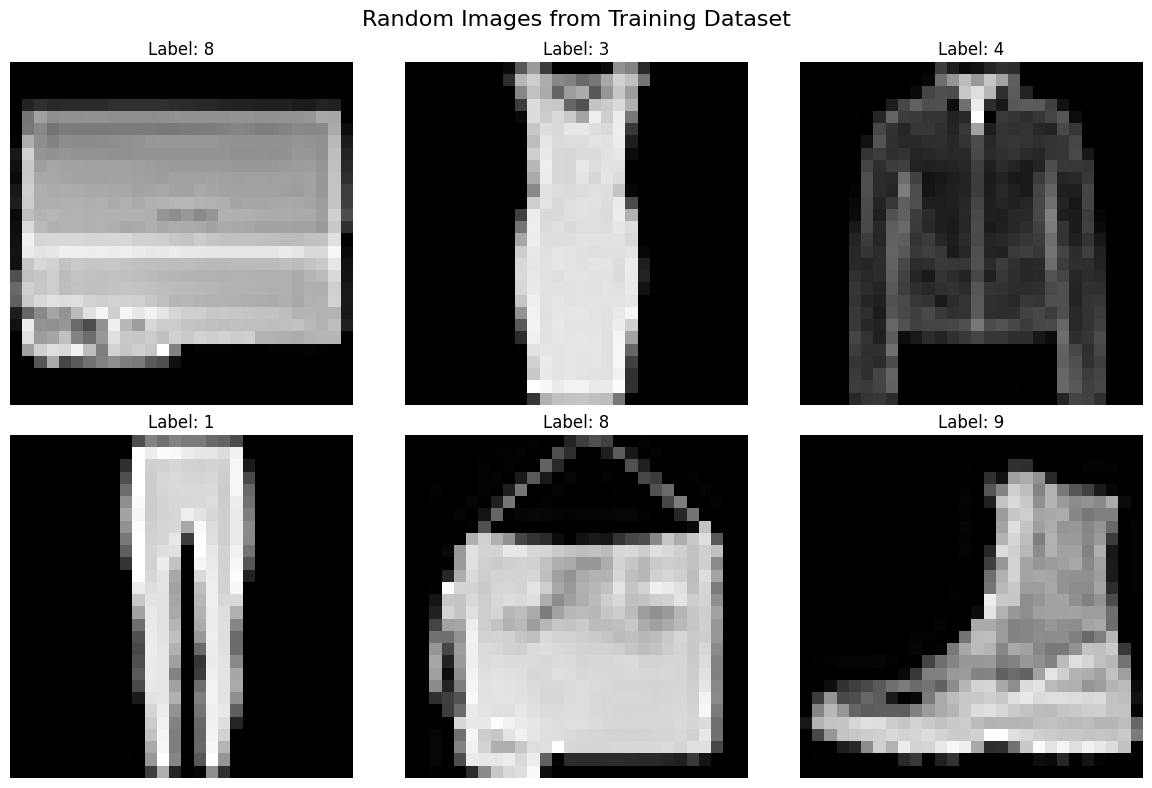

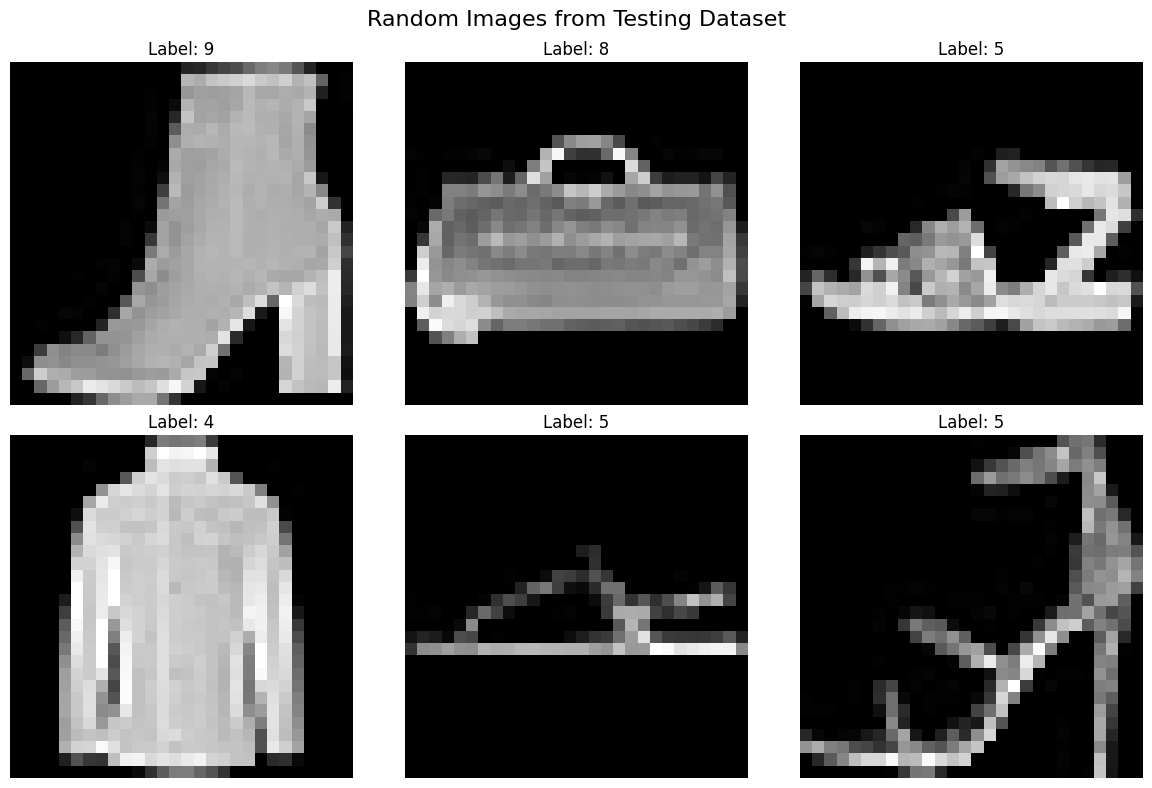

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_random_images(x_data, y_data, dataset_name):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))      # 2 -> row, 3 -> column.
    fig.suptitle(f'Random Images from {dataset_name} Dataset', fontsize=16)

    # This loop iterates over all the axes in the axes array.
    # The enumerate function provides both the index i and the actual axis ax.
    for i, ax in enumerate(axes.flat):
        # This line generates a random integer between 0 and the length of the dataset (len(x_data)).
        # This random integer is used as an index to select a random image from the dataset.
        idx = np.random.randint(0, len(x_data))

        # This line displays the image corresponding to the random index idx on the current axis ax.
        # The reshape(28, 28) is used to reshape the image from a flattened array to its original 28x28 shape.
        # The cmap='gray' argument specifies that the image should be displayed in grayscale.
        ax.imshow(x_data[idx].reshape(28, 28), cmap='gray')

        # This line turns off the axis (i.e., the x and y axes) for the current axis ax,
        # so only the image is displayed without any axis ticks or labels.
        ax.set_axis_off()

        # This line sets the title for the current axis ax to display the label corresponding to the random index idx.
        # The y_data[idx] contains the label for the randomly selected image.
        ax.set_title(f'Label: {y_data[idx]}')

    # This command adjusts the spacing between subplots to prevent
    plt.tight_layout()
    plt.show()

# Display 6 random images from the training dataset
display_random_images(x_train, y_train, 'Training')

# Display 6 random images from the testing dataset
display_random_images(x_test, y_test, 'Testing')

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
# Normalize pixel values to be between 0 and 1 (range between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension (since the images are grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),      # 32 -> عدد ال kernal, (3,3) -> حجم ال kernal (ثابت).
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),      # Dense -> fully connected layer.
    Dense(10, activation='softmax')     # 10 -> عدد ال class.
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
938/938 [==============================] - 50s 52ms/step - loss: 0.7905 - accuracy: 0.8162
Epoch 2/5
938/938 [==============================] - 47s 51ms/step - loss: 0.3472 - accuracy: 0.8731
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.3054 - accuracy: 0.8867
Epoch 4/5
938/938 [==============================] - 48s 52ms/step - loss: 0.2777 - accuracy: 0.8965
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.3306 - accuracy: 0.8833
Test accuracy: 0.8833000063896179


In [ ]:
# Adding a callback
class myCallback(tf.keras.callbacks.Callback):      # callback: عشان ما يصير overfitting (بحدد حد أقصى ل accuracy إذا وصلها بتوقف عندها).

    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>0.95:      # log file: معلومات ال train.
            print("\nReached 95% accuracy so stopping training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Build the CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, epochs=20,  callbacks=[callbacks])

# Evaluate the model
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
1875/1875 [==============================] - 54s 28ms/step - loss: 0.6146 - accuracy: 0.8219
Epoch 2/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3448 - accuracy: 0.8726
Epoch 3/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3021 - accuracy: 0.8867
Epoch 4/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2768 - accuracy: 0.8966
Epoch 5/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2589 - accuracy: 0.9025
Epoch 6/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2393 - accuracy: 0.9105
Epoch 7/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2262 - accuracy: 0.9151
Epoch 8/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2118 - accuracy: 0.9203
Epoch 9/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2020 - accuracy: 0.9245
Epoch 10/20
1875/1875 [==============================] - 52s 28m